In [72]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 16.4 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#DataSet:
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code
#https://www.kaggle.com/code/noordeen/notebookac348e4669

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0


In [6]:
data['Class'].value_counts()

0.0    65283
1.0      169
Name: Class, dtype: int64

In [7]:
data['Class'].value_counts(normalize = 'True')

0.0    0.997418
1.0    0.002582
Name: Class, dtype: float64

<AxesSubplot: >

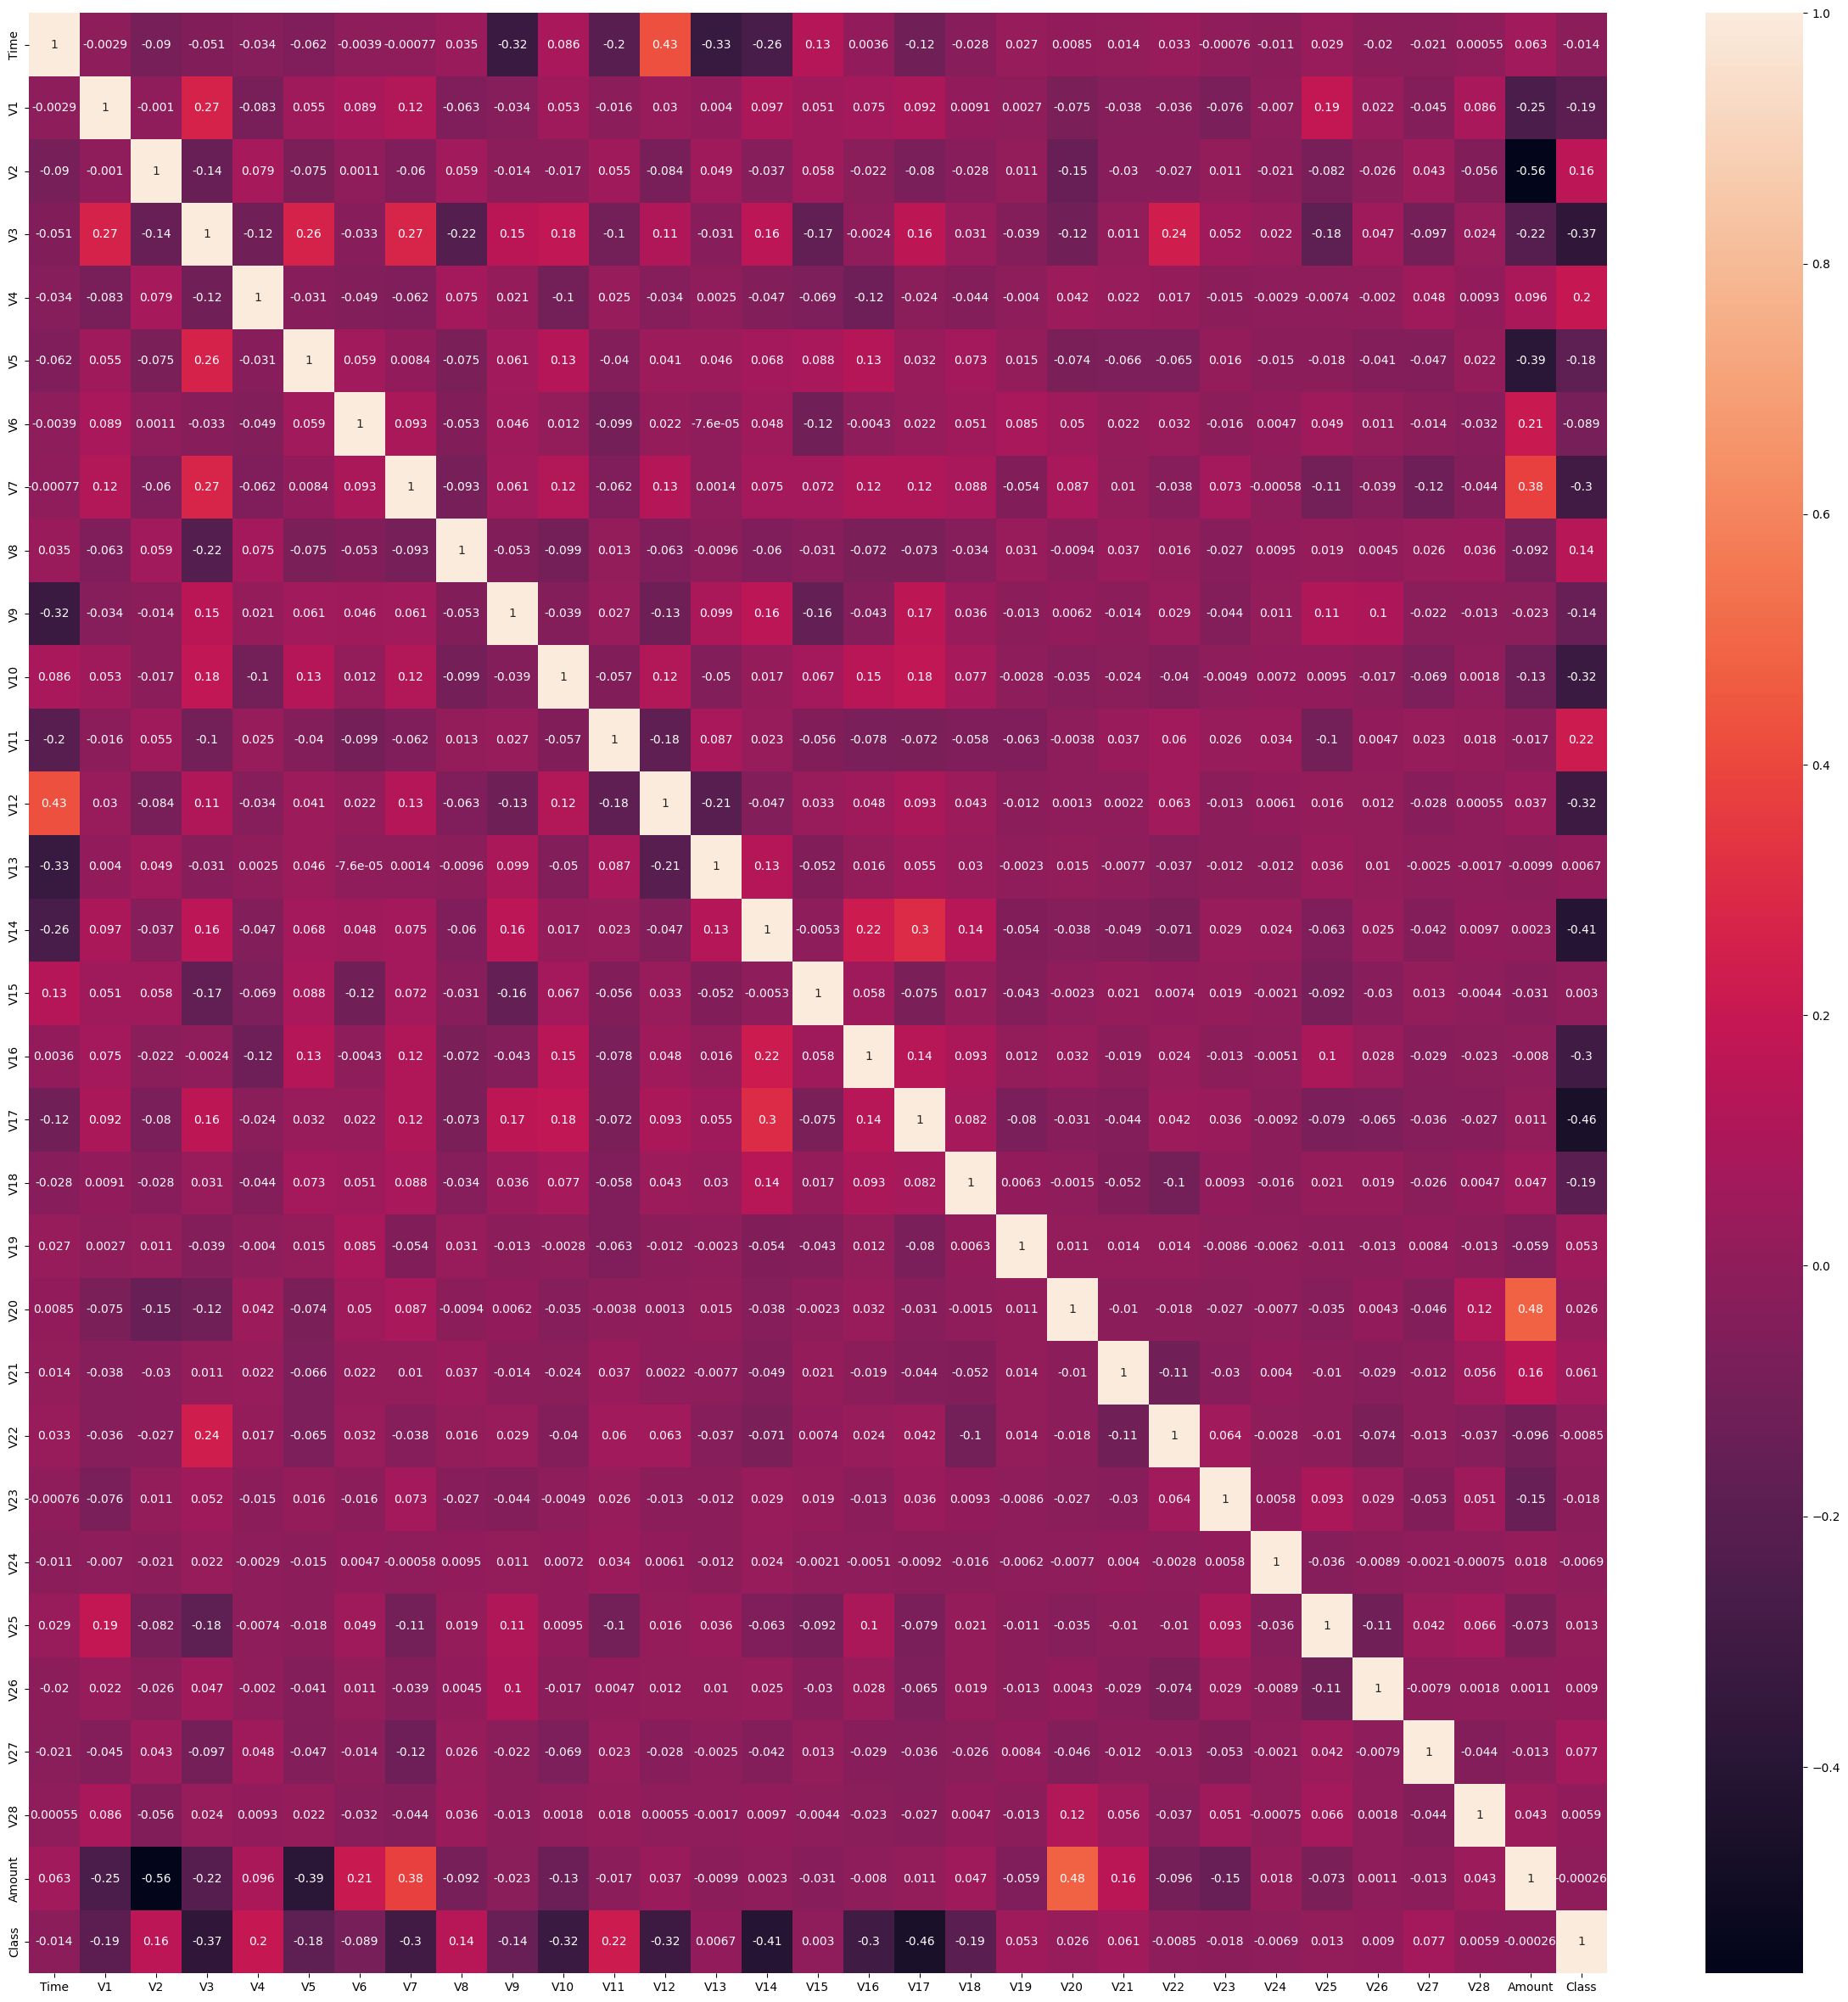

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot = True)

In [9]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
data.duplicated().sum()

260

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data['Class'].value_counts(normalize = 'True')

0.0    0.997408
1.0    0.002592
Name: Class, dtype: float64

In [13]:
data['Class'].value_counts()

0.0    65023
1.0      169
Name: Class, dtype: int64

In [14]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,...,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,...,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,...,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,...,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0


<AxesSubplot: xlabel='Class'>

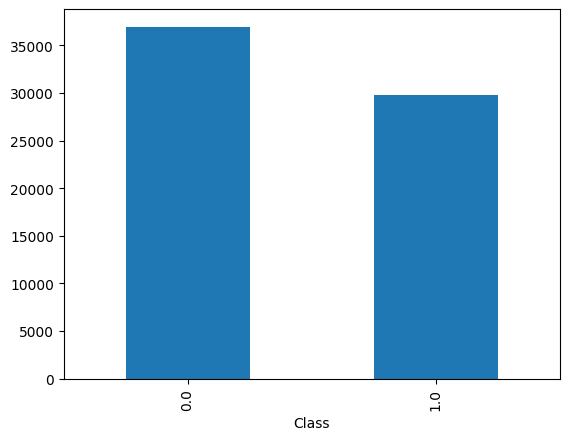

In [15]:
data.groupby('Class').Time.median().plot(kind = 'bar')

<AxesSubplot: xlabel='Class'>

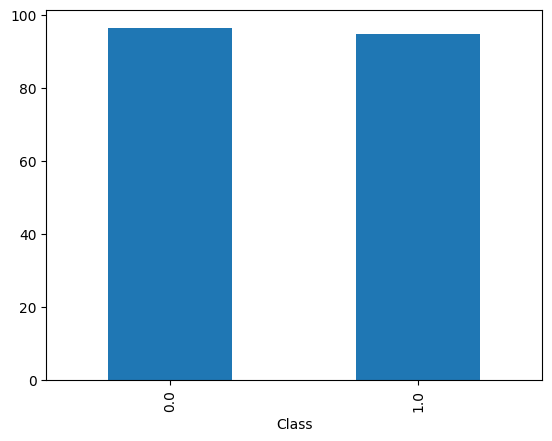

In [16]:
data.groupby('Class').Amount.mean().plot(kind = 'bar')

<AxesSubplot: xlabel='Class', ylabel='Amount'>

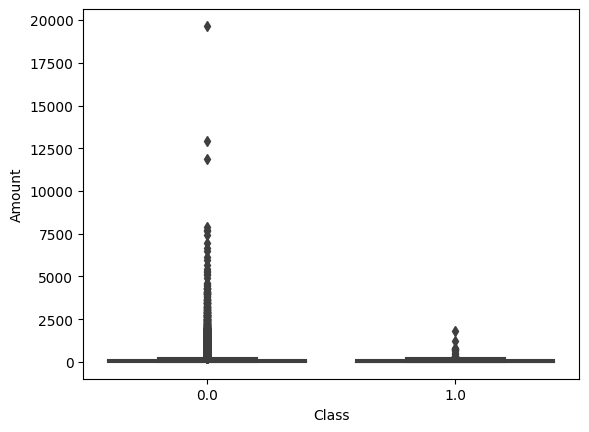

In [17]:
sns.boxplot(x = 'Class', y = 'Amount', data = data)

In [18]:
data = data.dropna()

In [19]:
X = data.drop(columns = ['Class'])
y = data['Class']

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=12)

In [21]:
model_dt = DecisionTreeClassifier()
model_dt.fit(train_X,train_y)

DecisionTreeClassifier()

In [22]:
from sklearn import tree
text_representation = tree.export_text(model_dt)
print(text_representation)


|--- feature_12 <= -5.01
|   |--- feature_26 <= -0.27
|   |   |--- feature_26 <= -0.37
|   |   |   |--- class: 1.0
|   |   |--- feature_26 >  -0.37
|   |   |   |--- class: 0.0
|   |--- feature_26 >  -0.27
|   |   |--- feature_20 <= 1.71
|   |   |   |--- feature_13 <= -1.58
|   |   |   |   |--- feature_15 <= 0.65
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_15 >  0.65
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_13 >  -1.58
|   |   |   |   |--- feature_28 <= 0.91
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_28 >  0.91
|   |   |   |   |   |--- feature_22 <= -0.41
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_22 >  -0.41
|   |   |   |   |   |   |--- class: 1.0
|   |   |--- feature_20 >  1.71
|   |   |   |--- feature_1 <= -28.59
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  -28.59
|   |   |   |   |--- class: 0.0
|--- feature_12 >  -5.01
|   |--- feature_17 <= -2.74
|   |   |--- feature_21 <= 

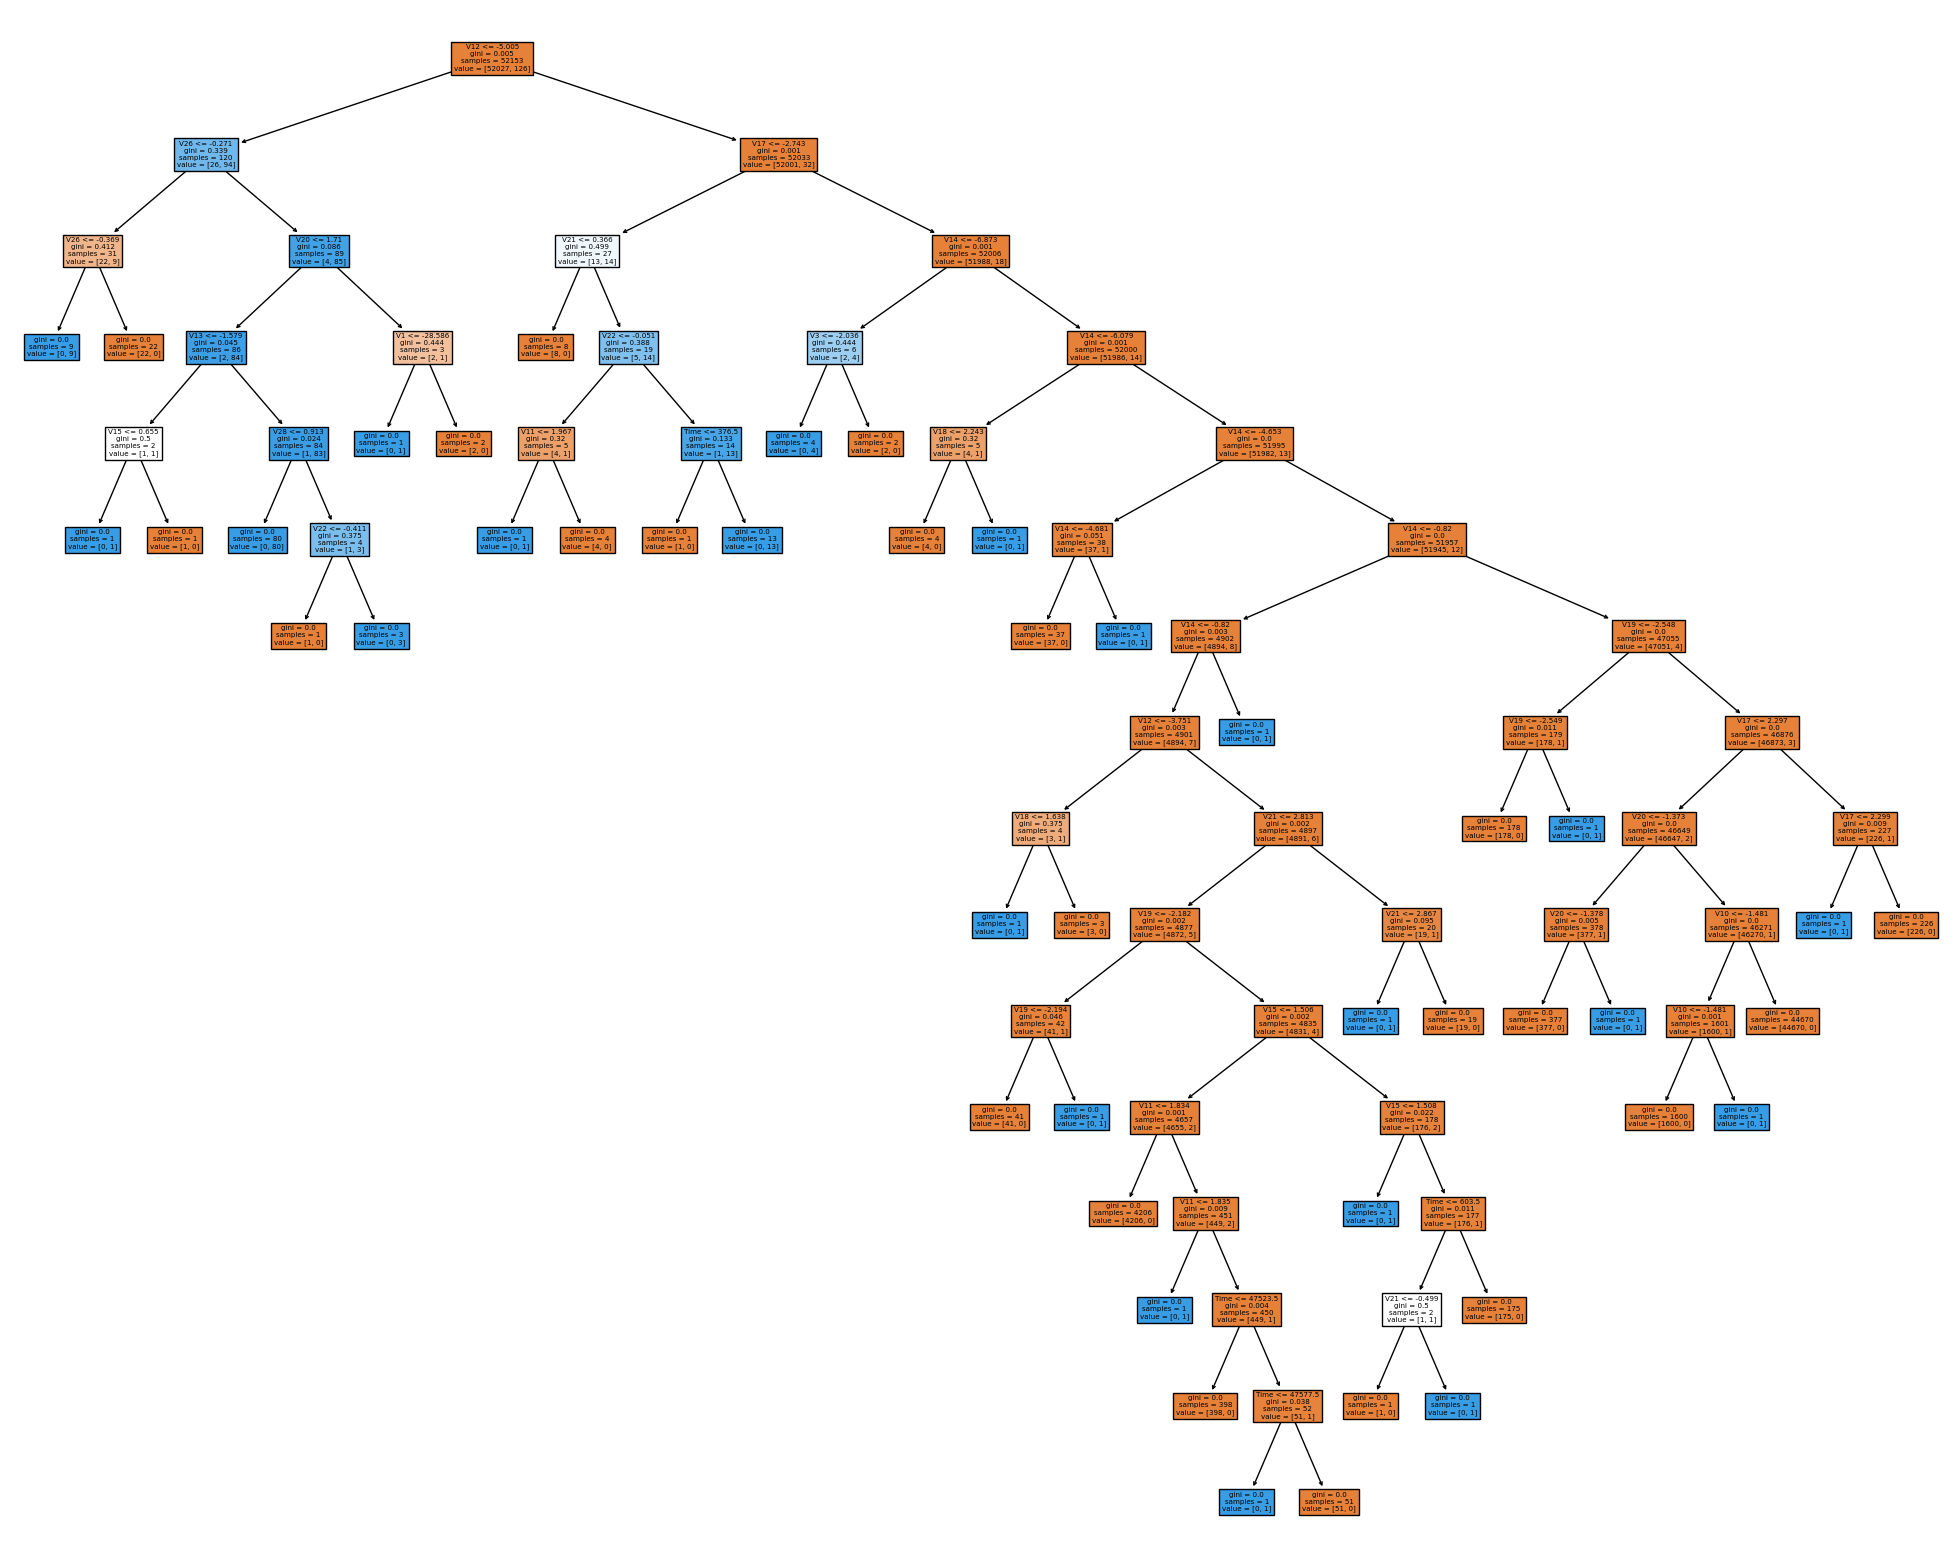

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_dt, feature_names=train_X.columns, filled=True)


In [24]:
train_pred = model_dt.predict(train_X)
print(confusion_matrix(train_y, train_pred))

[[52027     0]
 [    0   126]]


In [25]:
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52027
         1.0       1.00      1.00      1.00       126

    accuracy                           1.00     52153
   macro avg       1.00      1.00      1.00     52153
weighted avg       1.00      1.00      1.00     52153



In [26]:
test_pred = model_dt.predict(test_X)
print(confusion_matrix(test_y, test_pred))

[[12993     3]
 [   13    30]]


In [27]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12996
         1.0       0.91      0.70      0.79        43

    accuracy                           1.00     13039
   macro avg       0.95      0.85      0.89     13039
weighted avg       1.00      1.00      1.00     13039



In [28]:
scale = StandardScaler()
train_X = pd.DataFrame(scale.fit_transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scale.fit_transform(test_X), columns = test_X.columns)


In [29]:
train_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.537552,-0.549595,0.960332,-0.147360,1.458644,0.597762,0.353711,0.261517,0.255493,-0.966334,...,-0.505429,0.282153,0.608228,0.029727,-1.613822,-1.244564,0.186592,-1.595337,0.323270,-0.324893
1,0.253975,0.667701,-0.010723,-0.324495,0.788849,0.242330,0.209224,0.176547,0.023105,-0.100733,...,-0.013506,0.014042,0.201001,-0.251716,-0.449759,1.231906,-0.682832,0.064005,0.043892,-0.046182
2,0.253975,0.687239,-0.458091,-0.464590,-0.452501,-0.057434,0.508602,-0.485171,0.269867,-0.541670,...,0.013003,0.170808,0.584139,0.225455,-1.220395,-0.140286,-0.438179,0.194060,0.107375,-0.039498
3,-2.187156,-0.343143,0.510289,0.847606,-0.596872,0.486521,-0.360550,0.690715,-0.061635,-0.333867,...,-0.074200,-0.203478,-0.435749,-0.074645,0.301225,-0.967939,-0.198321,0.009819,-0.247424,-0.344506
4,0.513838,-0.502770,0.353471,0.953516,-0.647734,0.383438,0.055171,0.260693,0.045777,0.166978,...,-0.179679,-0.080300,-0.142628,-0.373070,-0.566644,0.014276,0.203889,-0.956032,-0.494388,-0.315981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52148,0.483895,0.778177,-0.046844,-0.379452,0.013075,-0.190555,-0.776159,0.137287,-0.137061,0.042441,...,-0.199915,0.008569,0.116508,-0.067476,1.026868,0.729642,2.086927,-0.281917,-0.050341,-0.268464
52149,-0.199565,-0.461637,0.443907,-0.238507,-0.208123,2.127240,3.012347,0.683257,0.172150,-0.038035,...,-0.019467,-0.251375,-0.254536,-0.460788,1.695788,1.185862,-0.647008,-2.272681,-1.059549,-0.175110
52150,1.081135,-0.706248,1.060576,0.390978,-0.000534,-0.242455,-1.074747,0.348980,0.497690,-0.835724,...,-0.620222,0.317968,0.490206,-0.338572,1.507660,1.156778,-0.947453,-0.932782,-0.202219,-0.338005
52151,0.434697,0.825672,-0.291345,-0.631576,-0.595766,-0.161016,-0.725886,0.049206,-0.295933,-1.058799,...,0.187863,0.451667,1.369536,-0.292670,0.251910,1.379384,-0.076312,-0.045159,0.021715,-0.096840


In [30]:
def model_result(model_dt, train_X, test_X, train_y, test_y):
    model_dt.fit(train_X,train_y)
    train_pred = model_dt.predict(train_X)
    print('Train Confusion Matrix')
    print(confusion_matrix(train_y, train_pred))
    print('Test Confusion Matrix')
    test_pred = model_dt.predict(test_X)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(train_y, train_pred))
    print(classification_report(test_y, test_pred))

In [31]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X, test_X, train_y, test_y)

Train Confusion Matrix
[[52027     0]
 [    0   126]]
Test Confusion Matrix
[[12991     5]
 [   16    27]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52027
         1.0       1.00      1.00      1.00       126

    accuracy                           1.00     52153
   macro avg       1.00      1.00      1.00     52153
weighted avg       1.00      1.00      1.00     52153

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12996
         1.0       0.84      0.63      0.72        43

    accuracy                           1.00     13039
   macro avg       0.92      0.81      0.86     13039
weighted avg       1.00      1.00      1.00     13039



In [32]:
sample = RandomUnderSampler()
train_X_sample, train_y_sample = sample.fit_resample(train_X, train_y)


<AxesSubplot: >

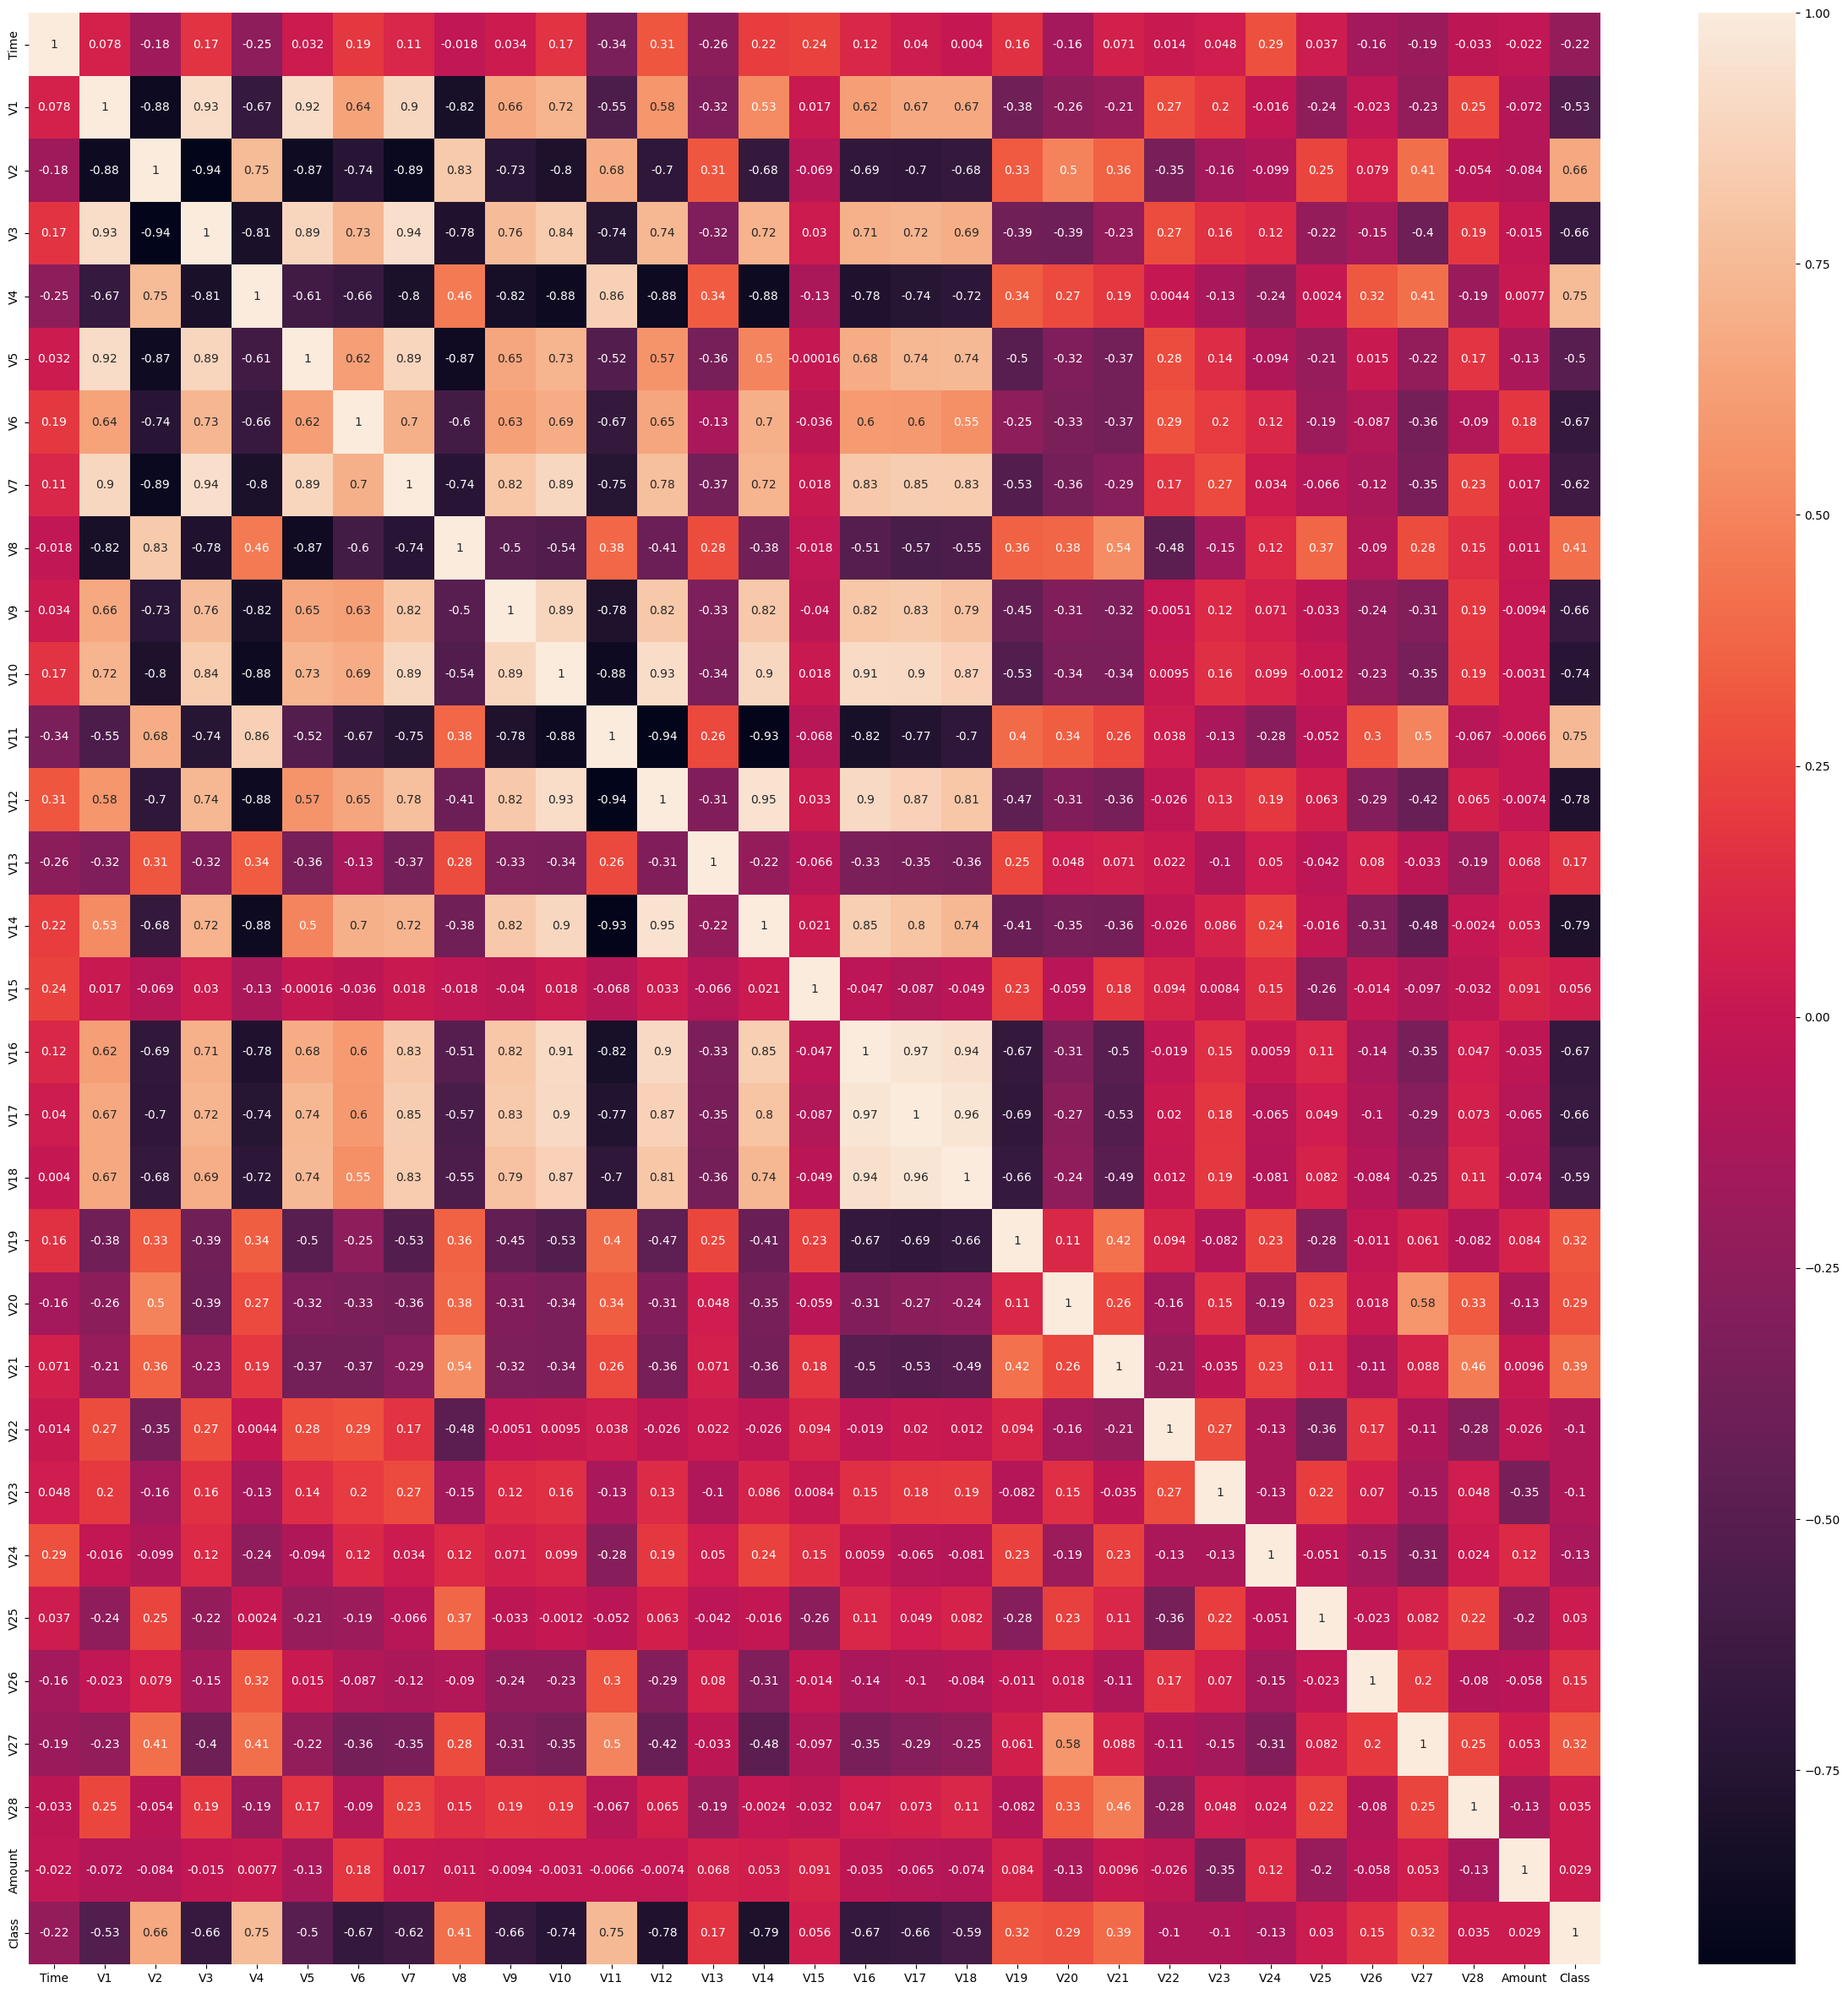

In [33]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([train_X_sample, train_y_sample], axis  =1).corr(), annot = True)

In [34]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X_sample, test_X, train_y_sample, test_y)

Train Confusion Matrix
[[126   0]
 [  0 126]]
Test Confusion Matrix
[[11881  1115]
 [    2    41]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       126
         1.0       1.00      1.00      1.00       126

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96     12996
         1.0       0.04      0.95      0.07        43

    accuracy                           0.91     13039
   macro avg       0.52      0.93      0.51     13039
weighted avg       1.00      0.91      0.95     13039



In [35]:
sample = RandomOverSampler()
train_X_over_sample, train_y_over_sample = sample.fit_resample(train_X, train_y)


In [36]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X_over_sample, test_X, train_y_over_sample, test_y)

Train Confusion Matrix
[[52027     0]
 [    0 52027]]
Test Confusion Matrix
[[12992     4]
 [   14    29]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52027
         1.0       1.00      1.00      1.00     52027

    accuracy                           1.00    104054
   macro avg       1.00      1.00      1.00    104054
weighted avg       1.00      1.00      1.00    104054

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12996
         1.0       0.88      0.67      0.76        43

    accuracy                           1.00     13039
   macro avg       0.94      0.84      0.88     13039
weighted avg       1.00      1.00      1.00     13039



In [37]:
train_X_sample, test_X, train_y_sample, test_y

(         Time         V1        V2         V3        V4         V5        V6  \
 0   -2.285552   0.778165  0.043282  -0.032925  1.110540  -0.101846  0.014746   
 1    1.028398  -0.146679  0.495086   0.638927 -0.212989   0.115530 -0.289059   
 2   -2.330998  -0.174489 -0.028134   1.054304 -1.538489   0.157173  0.490219   
 3    1.058341   0.782311  0.080160  -0.098234  0.490190  -0.152038 -0.604967   
 4    0.093073   0.893775 -0.639102  -0.067873 -1.216449  -0.832702 -0.357176   
 ..        ...        ...       ...        ...       ...        ...       ...   
 247 -0.333567 -15.218965  9.618275 -21.036819  4.553018 -14.693314 -3.783459   
 248 -0.484700  -9.811465  7.021498 -15.409990  4.256590 -10.156816 -3.236090   
 249  0.601686 -11.120126  5.966439 -14.394828  4.341570 -10.651550 -1.784520   
 250 -0.914526  -8.382461  5.320561 -16.387885  8.478531  -6.319282 -1.896666   
 251 -0.455818 -12.010556  8.003503 -17.670890  4.397180 -11.914496 -3.503205   
 
             V7         V8

In [38]:
test_X.to_csv("data_test.csv", index = False)

In [39]:
from pycaret.classification import *

In [40]:
train_X_sample = train_X_sample.reset_index().drop(columns = 'index')
train_y_sample = train_y_sample.reset_index().drop(columns = 'index')


In [41]:
data_preprocessed = pd.concat([train_X_sample,train_y_sample], axis = 1)

In [ ]:
data_preprocessed.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
clf = setup(data = data_preprocessed, target='Class', log_experiment=True, experiment_name= 'Pycaret_Experiement')

,Description,Value
0,Session id,1000
1,Target,Class
2,Target type,Binary
3,Original data shape,"(252, 31)"
4,Transformed data shape,"(252, 31)"
5,Transformed train set shape,"(176, 31)"
6,Transformed test set shape,"(76, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


2023/12/09 06:19:41 INFO mlflow.tracking.fluent: Experiment with name 'Pycaret_Experiement' does not exist. Creating a new experiment.


In [43]:
all_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9608,0.9850,0.9431,0.9789,0.9593,0.9214,0.9243,0.0870
knn,K Neighbors Classifier,0.9497,0.9573,0.9208,0.9789,0.9452,0.8992,0.9056,0.0230
xgboost,Extreme Gradient Boosting,0.9497,0.9836,0.9208,0.9789,0.9461,0.8992,0.9049,0.0510
lightgbm,Light Gradient Boosting Machine,0.9497,0.9787,0.9208,0.9789,0.9445,0.8992,0.9064,0.2240
et,Extra Trees Classifier,0.9441,0.9836,0.9097,0.9789,0.9386,0.8881,0.8959,0.1230
catboost,CatBoost Classifier,0.9441,0.9835,0.9097,0.9789,0.9386,0.8881,0.8959,4.3830
rf,Random Forest Classifier,0.9386,0.9722,0.8986,0.9789,0.9300,0.8770,0.8872,0.1590
nb,Naive Bayes,0.9327,0.9648,0.8875,0.9764,0.9262,0.8653,0.8730,0.0280
gbc,Gradient Boosting Classifier,0.9271,0.9718,0.8986,0.9539,0.9190,0.8542,0.8622,0.1890
svm,SVM - Linear Kernel,0.9265,0.0000,0.9431,0.9209,0.9294,0.8524,0.8578,0.0260


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [44]:
!mlflow ui

[2023-12-09 06:21:54 +0000] [2853] [INFO] Starting gunicorn 20.1.0
[2023-12-09 06:21:54 +0000] [2853] [INFO] Listening at: http://127.0.0.1:5000 (2853)
[2023-12-09 06:21:54 +0000] [2853] [INFO] Using worker: sync
[2023-12-09 06:21:54 +0000] [2854] [INFO] Booting worker with pid: 2854
[2023-12-09 06:22:15 +0000] [2853] [INFO] Handling signal: int

Aborted!
[2023-12-09 06:22:15 +0000] [2854] [INFO] Worker exiting (pid: 2854)
[2023-12-09 06:22:15 +0000] [2853] [INFO] Shutting down: Master


In [45]:
!pip install mlflow --quiet
get_ipython().system_raw("mlflow ui --port 5000 &")

In [46]:
!pip install pyngrok --quiet

from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://201f-34-125-63-174.ngrok-free.app


In [47]:
ada = create_model('ada')

# tune model
tuned_dt = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.9877,0.8889,1.0000,0.9412,0.8889,0.8944
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9444,1.0000,1.0000,0.9000,0.9474,0.8889,0.8944
3,0.8889,0.9630,0.8889,0.8889,0.8889,0.7778,0.7778
4,0.9444,1.0000,0.8889,1.0000,0.9412,0.8889,0.8944
5,0.9444,0.9136,0.8889,1.0000,0.9412,0.8889,0.8944
6,0.9412,0.9861,0.8750,1.0000,0.9333,0.8811,0.8874
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9444,0.9506,0.8889,1.0000,0.9412,0.8889,0.8944
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8889,0.9136,0.8889,0.8889,0.8889,0.7778,0.7778
4,0.9444,1.0000,0.8889,1.0000,0.9412,0.8889,0.8944
5,0.9444,0.9136,0.8889,1.0000,0.9412,0.8889,0.8944
6,0.9412,0.9722,0.8750,1.0000,0.9333,0.8811,0.8874
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_dt

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=0.15, n_estimators=150,
                   random_state=1000)